# Description

This note book is to determine the type of equilibrium on each levl of initial mask coverage.

In [1]:
from myfunctions import *
import numpy as np
import pandas as pd
from scipy.optimize import fsolve

In [2]:
def GRBTp1q0(m=0.2,I_0=0.05,vo=0.5,mix=False):

    # 前面兩期的死亡人數
    d0 = (1-(17/18)**14) * 0.0138 * I_0
    Nation = Threeperiod_SIRD(S=1-I_0,I=I_0,q_0=m,q1_0=0,q1_1=0)
    Nation.serveralupdates(2)
    d1_phi, d1_n = Nation.d1_0, Nation.d1_1

    q1_0_coef=(1-d0)*(1-m)
    q1_1_coef=(1-d0)*m
    q1_0 = min(m/q1_0_coef,1)
    q1_1 = (m-q1_0_coef)/q1_1_coef if q1_0==1 else 0

    
    if q1_0<1:
        q2_00_coef=(1-q1_0)*(1-d0)*(1-d1_phi)*(1-m)
        q2_01_coef=q1_0*(1-d0)*(1-d1_phi)*(1-m)
        q2_10_coef=(1-d0)*(1-d1_n)*m

        q2_10 = min(m/q2_10_coef,1)
        q2_00 = min((m-q2_10_coef)/q2_00_coef,1) if q2_10==1 else 0
        q2_11 = 1 if q2_00==1 else 0
        q2_01 = (m-q2_10_coef-q2_00_coef)/q2_01_coef if q2_00==1 else 0

    else:
        q2_10_coef=(1-q1_1)*(1-d0)*(1-d1_n)*m
        q2_11_coef=q1_1*(1-d0)*(1-d1_n)*m
        q2_01_coef=(1-d0)*(1-d1_phi)*(1-m)

        q2_10 = min(m/q2_10_coef,1)
        q2_00 = 1 if q2_10==1 else 0 # 係數為 0 ，不影響 IC 條件
        q2_11 = min((m-q2_10_coef)/q2_11_coef,1) if q2_10==1 else 0
        q2_01 = (m-q2_10_coef-q2_11_coef)/q2_01_coef if q2_11==1 else 0

    phi_sign = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*q2_00
    phi_nsign= q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*q2_10
    n_sign   = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*(vo+q2_00)
    n_nsign  = q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*(vo+q2_10)

    ICphi = phi_sign-phi_nsign
    ICn   = n_sign-n_nsign
    
    return m,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01

def GRBTp1q1(m=0.2,I_0=0.05,vo=0.5,mix=False):
    # 前面兩期的死亡人數
    d0 = (1-(17/18)**14) * 0.0138 * I_0
    Nation = Threeperiod_SIRD(S=1-I_0,I=I_0,q_0=m,q1_0=0,q1_1=0)
    Nation.serveralupdates(2)
    d1_phi, d1_n = Nation.d1_0, Nation.d1_1

    q1_0_coef=(1-d0)
    q1_0 = m/q1_0_coef
    q1_1 = 0

    q2_00_coef=(1-q1_0)*(1-d0)*( (1-d1_phi)*(1-m)+(1-d1_n)*m )
    q2_01_coef=q1_0*(1-d0)*( (1-d1_phi)*(1-m)+(1-d1_n)*m )

    q2_10 = 1
    q2_00 = min(m/q2_00_coef,1) if q2_10==1 else 0
    q2_11 = 1 if q2_00==1 else 0
    q2_01 = (m-q2_00_coef)/q2_01_coef if q2_00==1 else 0

    phi_sign = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*q2_00
    phi_nsign= q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*q2_10
    n_sign   = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*(vo+q2_00)
    n_nsign  = q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*(vo+q2_10)

    ICphi = phi_sign-phi_nsign
    ICn   = n_sign-n_nsign
    
    return m,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
    
def GRBTp0q0(m=0.2,I_0=0.05,vo=0.5,mix=False):
    # 前面兩期的死亡人數
    d0 = (1-(17/18)**14) * 0.0138 * I_0
    Nation = Threeperiod_SIRD(S=1-I_0,I=I_0,q_0=m,q1_0=0,q1_1=0)
    Nation.serveralupdates(2)
    d1_phi, d1_n = Nation.d1_0, Nation.d1_1

    q1_1_coef=(1-d0)
    q1_0 = 1
    q1_1 = m/q1_1_coef

    q2_10_coef=(1-q1_1)*(1-d0)*( (1-d1_phi)*(1-m)+(1-d1_n)*m )
    q2_11_coef=q1_1*(1-d0)*( (1-d1_phi)*(1-m)+(1-d1_n)*m )

    q2_10 = min(m/q2_10_coef,1)
    q2_00 = 1 if q2_10==1 else 0 # 係數為 0 ，不影響 IC 條件
    q2_11 = (m-q2_10_coef)/q2_11_coef if q2_10==1 else 0
    q2_01 = 0

    phi_sign = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*q2_00
    phi_nsign= q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*q2_10
    n_sign   = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*(vo+q2_00)
    n_nsign  = q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*(vo+q2_10)

    ICphi = phi_sign-phi_nsign
    ICn   = n_sign-n_nsign
    
    return m,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01

In [3]:
m_vals=np.linspace(0.1,0.8,40)
result=map(lambda x: GRBTp1q0(x,I_0=0.01,vo=0.5),m_vals)
result=list(result)
datap1q0=pd.DataFrame.from_records(result, columns =['m','ICphi', 'ICn','q1_0','q1_1','q2_10','q2_00','q2_11','q2_01'])

result=map(lambda x: GRBTp1q1(x,I_0=0.01,vo=0.5),m_vals)
result=list(result)
datap1q1=pd.DataFrame.from_records(result, columns =['m','ICphi', 'ICn','q1_0','q1_1','q2_10','q2_00','q2_11','q2_01'])

result=map(lambda x: GRBTp0q0(x,I_0=0.01,vo=0.5),m_vals)
result=list(result)
datap0q0=pd.DataFrame.from_records(result, columns =['m','ICphi', 'ICn','q1_0','q1_1','q2_10','q2_00','q2_11','q2_01'])

In [4]:
# [(datap1q0.ICphi>0) & (datap1q0.ICn<0),(datap1q1.ICphi>0) & (datap1q1.ICn>0),(datap0q0.ICphi<0) & (datap0q0.ICn<0)]

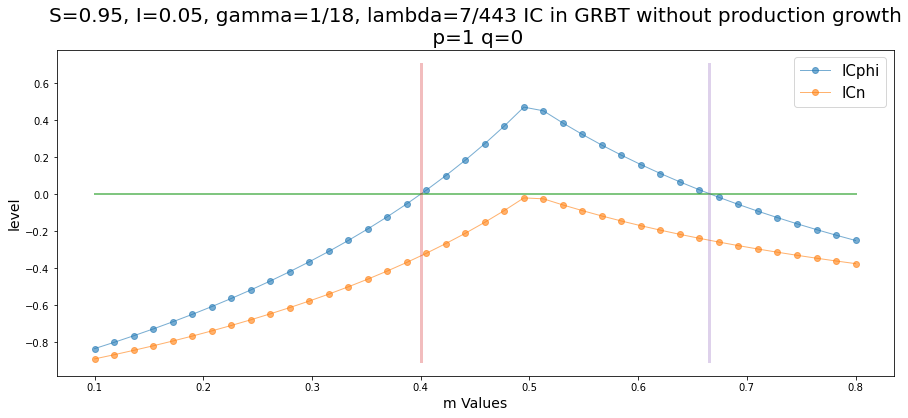

In [5]:
fig, ax=plt.subplots(figsize=(15, 6))

ax.plot(datap1q0.m,datap1q0.ICphi, 'o-', lw=1, alpha=0.6,label="ICphi")
ax.plot(datap1q0.m,datap1q0.ICn, 'o-', lw=1, alpha=0.6,label="ICn")
ax.plot(datap1q0.m,[0]*40, '-', lw=2, alpha=0.6)

# 畫m=0.4直線
ax.plot([0.4]*40,np.linspace(-0.9,0.7,40), '-', lw=3, alpha=0.3)
ax.plot([0.665]*40,np.linspace(-0.9,0.7,40), '-', lw=3, alpha=0.3)

ax.set_xlabel('m Values', fontsize=14)
ax.set_ylabel('level', fontsize=14)
# ax.set_title("S=0.95, I=0.05, gamma=1/18, lambda=7/443 IC in GRBT without production growth\n p=1 q=0",fontsize=20)
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend(fontsize=15)
plt.show()

In [6]:
datap1q0

,m,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
0,0.100000,-0.833311,-0.888871,0.111120,0.000000,1,0.000011,0,0.000000
1,0.117949,-0.799391,-0.866257,0.133731,0.000000,1,0.000014,0,0.000000
2,0.135897,-0.764062,-0.842703,0.157282,0.000000,1,0.000018,0,0.000000
3,0.153846,-0.727235,-0.818151,0.181832,0.000000,1,0.000021,0,0.000000
4,0.171795,-0.688810,-0.792534,0.207446,0.000000,1,0.000026,0,0.000000
5,0.189744,-0.648684,-0.765781,0.234195,0.000000,1,0.000031,0,0.000000
6,0.207692,-0.606739,-0.737817,0.262156,0.000000,1,0.000036,0,0.000000
7,0.225641,-0.562850,-0.708557,0.291413,0.000000,1,0.000043,0,0.000000
8,0.243590,-0.516878,-0.677907,0.322058,0.000000,1,0.000051,0,0.000000
9,0.261538,-0.468671,-0.645768,0.354194,0.000000,1,0.000060,0,0.000000


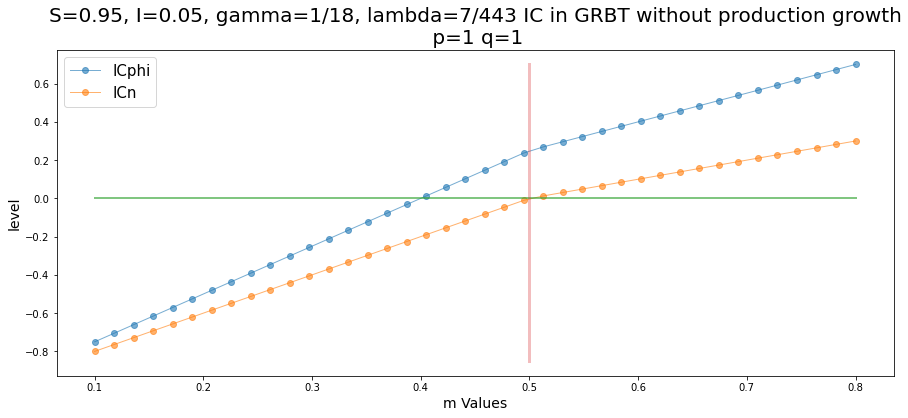

In [7]:
fig, ax=plt.subplots(figsize=(15, 6))

ax.plot(datap1q1.m,datap1q1.ICphi, 'o-', lw=1, alpha=0.6,label="ICphi")
ax.plot(datap1q1.m,datap1q1.ICn, 'o-', lw=1, alpha=0.6,label="ICn")
ax.plot(datap1q1.m,[0]*40, '-', lw=2, alpha=0.6)

# 畫m=0.5直線
ax.plot([0.5]*40,np.linspace(-0.85,0.7,40), '-', lw=3, alpha=0.3)

ax.set_xlabel('m Values', fontsize=14)
ax.set_ylabel('level', fontsize=14)
# ax.set_title("S=0.95, I=0.05, gamma=1/18, lambda=7/443 IC in GRBT without production growth\n p=1 q=1",fontsize=20)
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend(fontsize=15)
plt.show()

In [8]:
datap1q1

,m,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
0,0.100000,-0.749957,-0.799960,0.100008,0,1,0.111148,0,0.000000
1,0.117949,-0.705078,-0.764057,0.117958,0,1,0.133764,0,0.000000
2,0.135897,-0.660201,-0.728154,0.135908,0,1,0.157319,0,0.000000
3,0.153846,-0.615323,-0.692252,0.153858,0,1,0.181873,0,0.000000
4,0.171795,-0.570446,-0.656350,0.171808,0,1,0.207491,0,0.000000
5,0.189744,-0.525569,-0.620448,0.189758,0,1,0.234244,0,0.000000
6,0.207692,-0.480692,-0.584546,0.207708,0,1,0.262209,0,0.000000
7,0.225641,-0.435816,-0.548645,0.225658,0,1,0.291470,0,0.000000
8,0.243590,-0.390939,-0.512744,0.243608,0,1,0.322119,0,0.000000
9,0.261538,-0.346063,-0.476843,0.261558,0,1,0.354258,0,0.000000


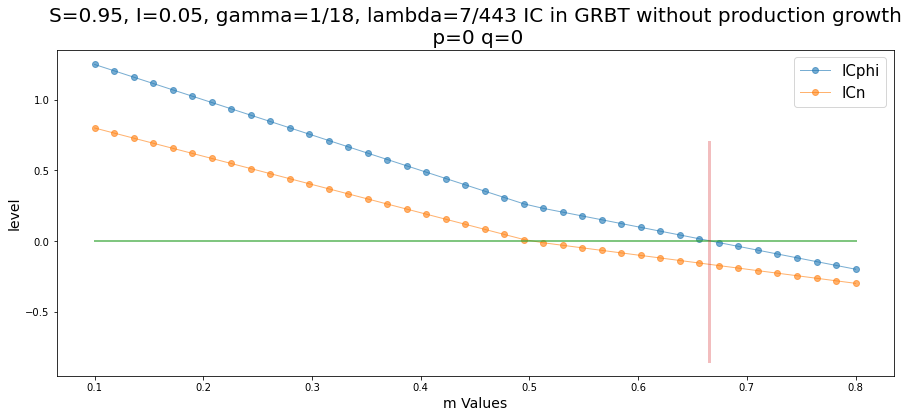

In [9]:
fig, ax=plt.subplots(figsize=(15, 6))

ax.plot(datap0q0.m,datap0q0.ICphi, 'o-', lw=1, alpha=0.6,label="ICphi")
ax.plot(datap0q0.m,datap0q0.ICn, 'o-', lw=1, alpha=0.6,label="ICn")
ax.plot(datap0q0.m,[0]*40, '-', lw=2, alpha=0.6)

# 畫直線
ax.plot([0.665]*40,np.linspace(-0.85,0.7,40), '-', lw=3, alpha=0.3)
ax.set_xlabel('m Values', fontsize=14)
ax.set_ylabel('level', fontsize=14)
# ax.set_title("S=0.95, I=0.05, gamma=1/18, lambda=7/443 IC in GRBT without production growth\n p=0 q=0",fontsize=20)
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend(fontsize=15)
plt.show()

In [10]:
datap0q0

,m,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
0,0.100000,1.249957,0.799960,1,0.100008,0.111148,0,0.000000,0
1,0.117949,1.205078,0.764057,1,0.117958,0.133764,0,0.000000,0
2,0.135897,1.160201,0.728154,1,0.135908,0.157319,0,0.000000,0
3,0.153846,1.115323,0.692252,1,0.153858,0.181873,0,0.000000,0
4,0.171795,1.070446,0.656350,1,0.171808,0.207491,0,0.000000,0
5,0.189744,1.025569,0.620448,1,0.189758,0.234244,0,0.000000,0
6,0.207692,0.980692,0.584546,1,0.207708,0.262209,0,0.000000,0
7,0.225641,0.935816,0.548645,1,0.225658,0.291470,0,0.000000,0
8,0.243590,0.890939,0.512744,1,0.243608,0.322119,0,0.000000,0
9,0.261538,0.846063,0.476843,1,0.261558,0.354258,0,0.000000,0
